# The Goal here is to Learn to Separate Audio in a Efficient Way

In [19]:
#Imports
import math
import librosa
import librosa.display
import IPython.display as ipd

import pyAudioAnalysis
import pydub
import ffmpeg

from numpy import sin, cos, pi, linspace, arange, log10, absolute, where
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter, freqz, welch
from scipy.io.wavfile import read , write
from scipy.signal import spectrogram
from matplotlib import pyplot
from matplotlib.pyplot import ylabel, xlabel
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig#, hold

In [4]:
filename = 'audio/training/J_cata_02.wav'
fs, audio1 = read(filename)
f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')
print('filename: ', filename)
print('Data Length (s): ',t[-1])
print('Sampling frequency (samples/s): ', fs)

#Playing Audio (Reproduce Audio)
ipd.Audio(filename)

filename:  audio/training/J_cata_02.wav
Data Length (s):  4.9
Sampling frequency (samples/s):  44100


Text(0, 0.5, 'frequency(Hz)')

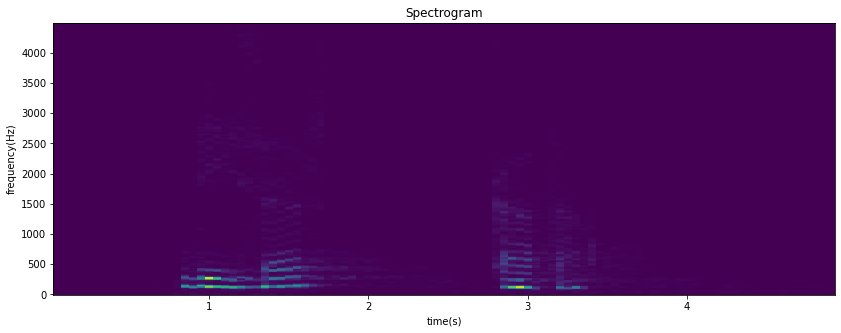

In [5]:
#Spectogram
pyplot.rcParams['figure.figsize'] = 14,5
pyplot.pcolormesh(t, f[:450], S1[:450][:])
pyplot.title("Spectrogram")
xlabel('time(s)')
ylabel('frequency(Hz)')
#show()

In [7]:
#Filtro ButterWord

wn = 1500/(fs/2)
b3,a3 = butter(4, wn)
audio1_filt = lfilter(b3,a3,audio1)

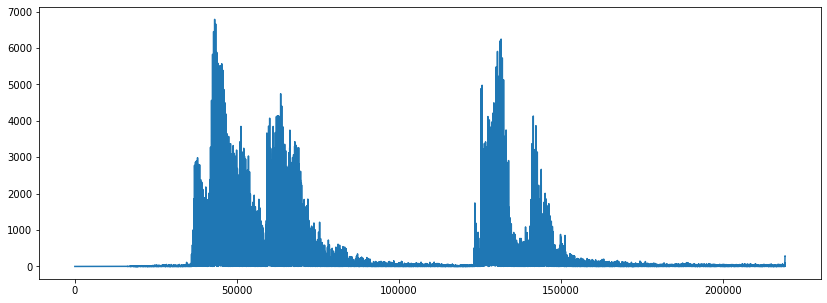

In [65]:
plot(abs(audio1_filt))

In [37]:
print(0.001*1e8)

100000.0


In [66]:
#results = [1 if item > 0.001*1e8 else -1 for item in audio1_filt**2]
results = [1 if item > 350 else -1 for item in audio1_filt]

(740,)

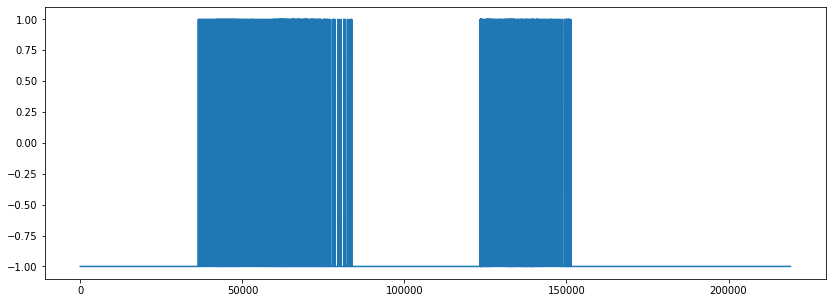

In [71]:
import numpy
plot(results)
#print(result)

#print(results)

zero_crossings = where(numpy.diff(numpy.sign(results)))[0]
zero_crossings.shape
#print(zero_crossings)

# Second Possibility f